In [10]:
import geopandas as gpd
import pandas as pd
from shapely.affinity import translate
import matplotlib.pyplot as plt
import math
from matplotlib import pyplot as plt
from matplotlib.legend_handler import HandlerPatch
from mpl_toolkits.mplot3d import Axes3D

## Read data


In [3]:
origin_hexgaon = gpd.read_file("../../Data/Output/Study_Area.shp")
print(origin_hexgaon.shape)

(22504, 2)


## Shift hexagon to 6 corners


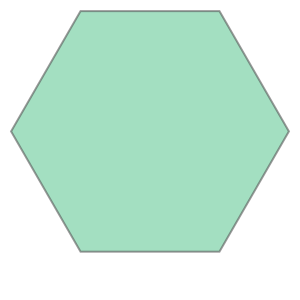

In [4]:
origin_hexgaon.geometry[0]

In [5]:
# Get coordinates of original centroids
x = origin_hexgaon.geometry[0].centroid.x
y = origin_hexgaon.geometry[0].centroid.y
x,y


(745603.4525000006, 2051234.2399555547)

In [6]:
xx_lst, yy_lst = origin_hexgaon.geometry[0].exterior.coords.xy
xx_lst.tolist()[:], yy_lst.tolist()[:]

([746003.4525000006,
  745803.4525000006,
  745403.4525000006,
  745203.4525000006,
  745403.4525000006,
  745803.4525000006,
  746003.4525000006],
 [2051234.2399999984,
  2050887.8297999986,
  2050887.8297999986,
  2051234.2399999984,
  2051580.6501000002,
  2051580.6501000002,
  2051234.2399999984])

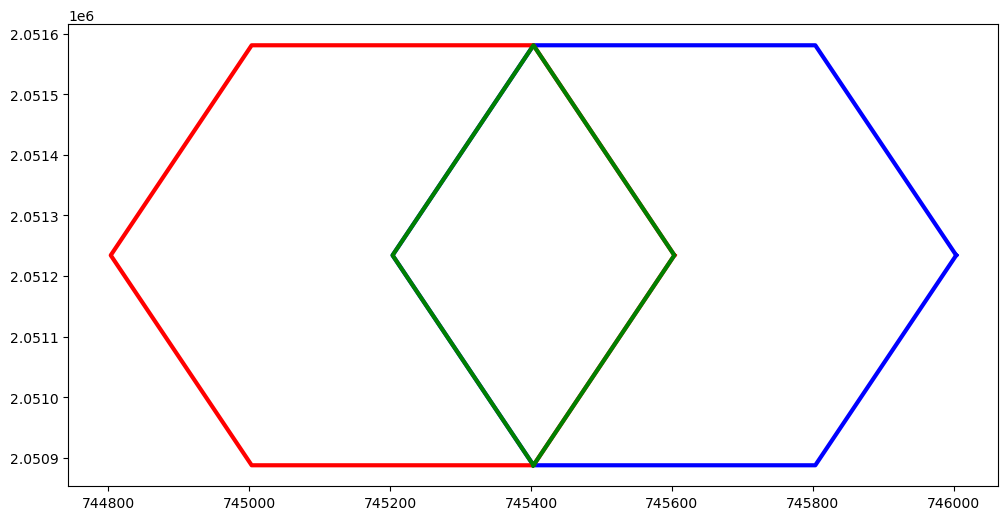

In [36]:
shifted_1 = translate(origin_hexgaon.geometry[0],xoff=(x - xx_lst[0]),yoff=(y - yy_lst[0]))
fig, ax = plt.subplots(figsize = (12,6))

ax.plot(*origin_hexgaon.geometry[0].exterior.xy,color = "blue", linewidth=3)
ax.plot(*shifted_1.exterior.xy, color = "red", linewidth=3)

# Create polygons
poly1 = origin_hexgaon.geometry[0] 
poly2 = shifted_1
# Get intersection  
intersection = poly1.intersection(poly2)

ax.plot(*intersection.exterior.xy, color = "green", linewidth=3)
# Show plot
plt.show()


### 3D plot


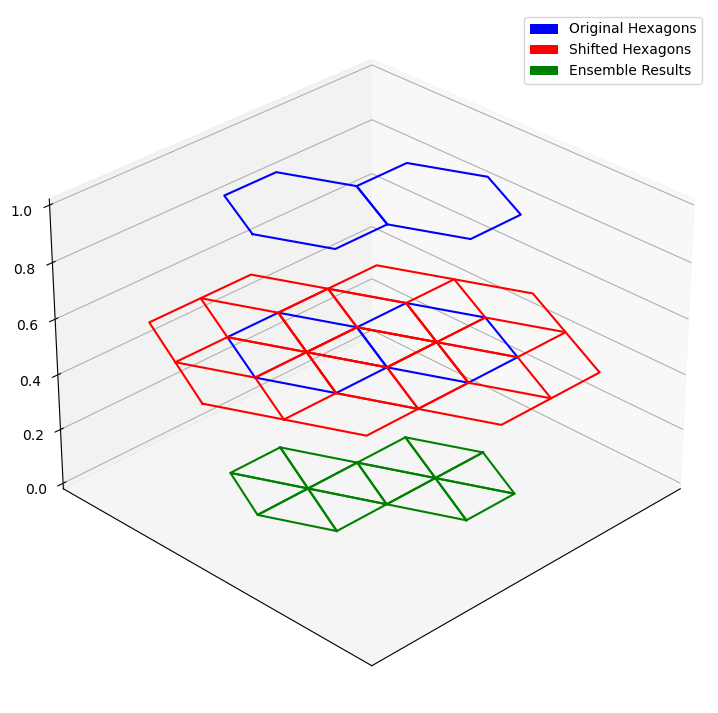

In [30]:
# Create 3D plot
fig = plt.figure(figsize = (15,9))
ax = fig.add_subplot(111, projection='3d')

# Set view angle
ax.view_init(elev=None, azim=45)

# Plot polygons on different z levels

for idx in [0,1]:
    poly1 = origin_hexgaon.geometry[idx]
    x = poly1.centroid.x
    y = poly1.centroid.y
    xx_lst, yy_lst = poly1.exterior.coords.xy
    poly2 = translate(poly1,xoff=(x - xx_lst[0]),yoff=(y - yy_lst[0]))
    poly3 = translate(poly1,xoff=(x - xx_lst[1]),yoff=(y - yy_lst[1]))
    poly4 = translate(poly1,xoff=(x - xx_lst[2]),yoff=(y - yy_lst[2]))
    poly5 = translate(poly1,xoff=(x - xx_lst[3]),yoff=(y - yy_lst[3]))
    poly6 = translate(poly1,xoff=(x - xx_lst[4]),yoff=(y - yy_lst[4]))
    poly7 = translate(poly1,xoff=(x - xx_lst[5]),yoff=(y - yy_lst[5]))
    ax.plot(*poly1.exterior.xy, zs=1, zdir='z', color='blue')
    ax.plot(*poly1.exterior.xy, zs=0.5, zdir='z', color='blue')
    ax.plot(*poly2.exterior.xy, zs=0.5, zdir='z', color='red')
    ax.plot(*poly3.exterior.xy, zs=0.5, zdir='z', color='red')
    ax.plot(*poly4.exterior.xy, zs=0.5, zdir='z', color='red')
    ax.plot(*poly5.exterior.xy, zs=0.5, zdir='z', color='red')
    ax.plot(*poly6.exterior.xy, zs=0.5, zdir='z', color='red')
    ax.plot(*poly7.exterior.xy, zs=0.5, zdir='z', color='red')
    
    # Get intersection  
    ax.plot(*poly1.intersection(poly2).intersection(poly3).exterior.xy, zs=0, zdir='z', color='green')
    ax.plot(*poly1.intersection(poly3).intersection(poly4).exterior.xy, zs=0, zdir='z', color='green')
    ax.plot(*poly1.intersection(poly4).intersection(poly5).exterior.xy, zs=0, zdir='z', color='green')
    ax.plot(*poly1.intersection(poly5).intersection(poly6).exterior.xy, zs=0, zdir='z', color='green')
    ax.plot(*poly1.intersection(poly6).intersection(poly7).exterior.xy, zs=0, zdir='z', color='green')
    ax.plot(*poly1.intersection(poly7).intersection(poly2).exterior.xy, zs=0, zdir='z', color='green')

# Set axis limits
ax.set_zlim(0,1)
# Remove x tick labels  
ax.set_xticks([])
# Remove y ticks and labels
ax.set_yticks([])
# Enable y grid lines
ax.yaxis.grid(True)

# Create proxy artists
blue_proxy = plt.Rectangle((0,0), 1, 1, fc="blue")
red_proxy = plt.Rectangle((0,0), 1, 1, fc="red")
green_proxy = plt.Rectangle((0,0), 1, 1, fc="green")

# Add legend
ax.legend([blue_proxy, red_proxy, green_proxy], 
          ["Original Hexagons", "Shifted Hexagons", "Ensemble Results"],
          handler_map={plt.Rectangle: HandlerPatch()})


plt.show()



## Execute shift to all hexagons


In [7]:
def shift_hexagon(row, index = 0):
    x,y = row.geometry.centroid.x, row.geometry.centroid.y
    xx_lst, yy_lst = row.geometry.exterior.coords.xy
    return translate(row.geometry,xoff=(x - xx_lst[index]),yoff=(y - yy_lst[index]))

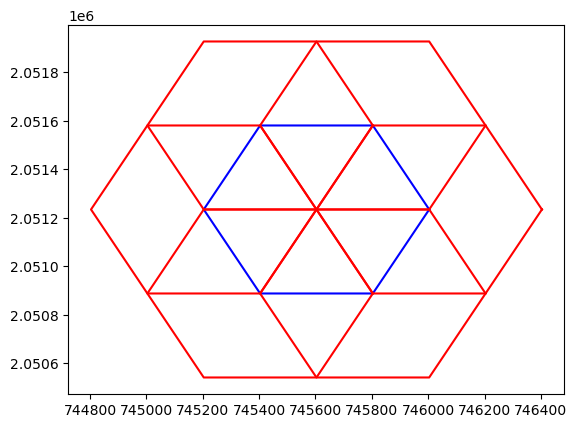

In [8]:
temp = origin_hexgaon.loc[:2,:]
fig, ax = plt.subplots()
ax.plot(*temp['geometry'][0].exterior.xy, color="blue")

for i in range(6):
    temp_1 = temp.copy()
    temp_1['geometry'] = temp.apply(lambda x: shift_hexagon(x,i),axis=1) 
    ax.plot(*temp_1['geometry'][0].exterior.xy, color="red")

plt.show()

../../Data/Output/Study_Area_0.shp
../../Data/Output/Study_Area_1.shp
../../Data/Output/Study_Area_2.shp
../../Data/Output/Study_Area_3.shp
../../Data/Output/Study_Area_4.shp
../../Data/Output/Study_Area_5.shp


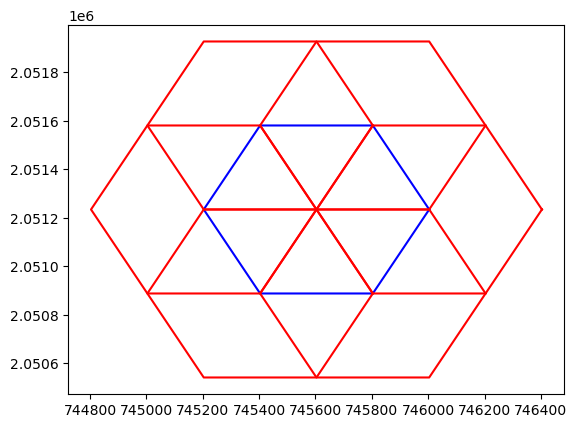

In [9]:
# Setup plot 
fig, ax = plt.subplots()
ax.plot(*origin_hexgaon.geometry[0].exterior.xy,color = "blue")

for idx in list(range(0,6)):
    shift_hexagon_gdf = origin_hexgaon.copy()
    shift_hexagon_gdf['geometry'] = origin_hexgaon.apply(lambda x: shift_hexagon(x,idx),axis=1)
    ax.plot(*shift_hexagon_gdf['geometry'][0].exterior.xy, color = "red")
    # intersections = intersect_with_poi(shift_hexagon_gdf)
    # print(f'{idx} : {intersections.shape[0]}')
    out_name = f"../../Data/Output/Study_Area_{idx}.shp"
    print(out_name)
    shift_hexagon_gdf.to_file(out_name)
    
# Show plot
plt.show()

## Calculate POI and Social events presence


In [12]:
poi = gpd.read_file("../../Data/POI/SafeGraph_POI/SafeGraph_Category_DFW.shp")
events = gpd.read_file("../../Data/Social-Events/events_in_dfw_reclass.shp")
print(poi.shape)
print(events.shape)

(102920, 14)
(9445, 22)


In [58]:
# Get unique POI and event types
poi_types = poi['Category'].unique()
event_types = events['new_cate'].unique()
poi_types,event_types

(array(['Retail Trade', 'Professional, Scientific, and Technical Services',
        'Health Care and Social Assistance',
        'Other Services (except Public Administration)',
        'Finance and Insurance', 'Accommodation and Food Services',
        'Educational Services', 'Real Estate and Rental and Leasing',
        'Arts, Entertainment, and Recreation',
        'Transportation and Warehousing', 'Manufacturing',
        'Administrative and Support and Waste Management and Remediation Services',
        'Information', 'Public Administration', 'Wholesale Trade',
        'Construction', 'Utilities',
        'Management of Companies and Enterprises',
        'Agriculture, Forestry, Fishing and Hunting'], dtype=object),
 array(['Hobbies & Passions', 'Religon & Identity', 'Science & Education',
        'Career & Business', 'Social Activities', 'Spots & Health',
        'Movements'], dtype=object))

In [59]:
# Spatial joins 
origin_hexgaon = origin_hexgaon.to_crs(poi.crs)
poi_joined = gpd.sjoin(poi,origin_hexgaon, how='left', predicate='intersects')
events_joined = gpd.sjoin(events,origin_hexgaon, how='left', predicate='intersects')
poi_joined.shape

(102920, 16)

In [83]:
result  = origin_hexgaon.to_crs(poi.crs).copy()
for event_type in event_types:
    result[event_type] = 0

for poi_type in poi_types:
    result[poi_type] = 0
result.shape

for row in poi_joined.iloc:
    if(math.isnan(row['index_right'])):
        pass
    else:
        result.loc[int(row['index_right']),(row['Category'])] += 1
        
for row in events_joined.iloc:
    if(math.isnan(row['index_right'])):
        pass
    else:
        result.loc[int(row['index_right']),(row['new_cate'])] += 1

result.head()

,label_num,geometry,Hobbies & Passions,Religon & Identity,Science & Education,Career & Business,Social Activities,Spots & Health,Movements,Retail Trade,...,Transportation and Warehousing,Manufacturing,Administrative and Support and Waste Management and Remediation Services,Information,Public Administration,Wholesale Trade,Construction,Utilities,Management of Companies and Enterprises,"Agriculture, Forestry, Fishing and Hunting"
0,0,"POLYGON ((746003.453 2051234.240, 745803.453 2...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,"POLYGON ((746603.453 2050887.830, 746403.453 2...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,"POLYGON ((747203.453 2051234.240, 747003.453 2...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,"POLYGON ((746603.453 2051580.650, 746403.453 2...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,"POLYGON ((747203.453 2051927.060, 747003.453 2...",0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [84]:
result[list(poi_types) + list(event_types)].describe()

,Retail Trade,"Professional, Scientific, and Technical Services",Health Care and Social Assistance,Other Services (except Public Administration),Finance and Insurance,Accommodation and Food Services,Educational Services,Real Estate and Rental and Leasing,"Arts, Entertainment, and Recreation",Transportation and Warehousing,...,Utilities,Management of Companies and Enterprises,"Agriculture, Forestry, Fishing and Hunting",Hobbies & Passions,Religon & Identity,Science & Education,Career & Business,Social Activities,Spots & Health,Movements
count,22504.000000,22504.000000,22504.000000,22504.000000,22504.000000,22504.000000,22504.000000,22504.00000,22504.00000,22504.000000,...,22504.000000,22504.000000,22504.000000,22504.000000,22504.000000,22504.000000,22504.000000,22504.000000,22504.000000,22504.000000
mean,1.110158,0.082341,0.791326,0.751155,0.327186,0.717250,0.157261,0.12069,0.22947,0.055012,...,0.004621,0.000355,0.000311,0.113846,0.037371,0.058478,0.038215,0.046170,0.100249,0.021241
std,3.235405,0.363075,2.925432,2.085968,1.133805,2.310554,0.512322,0.49439,0.69607,0.266807,...,0.067825,0.018852,0.017634,1.810420,0.838132,1.120660,0.768530,0.864222,1.479839,0.528604
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,123.000000,9.000000,167.000000,42.000000,25.000000,65.000000,9.000000,10.00000,13.00000,6.000000,...,1.000000,1.000000,1.000000,92.000000,67.000000,65.000000,45.000000,58.000000,63.000000,28.000000


In [91]:
column_mapping = {
    'Career & Business': 'CareerBiz',
    'Hobbies & Passions': 'HobbiesPas', 
    'Movements': 'Movements',
    'Religon & Identity': 'ReligionId',
    'Science & Education': 'SciEdu',
    'Social Activities': 'SocialAct',
    'Spots & Health': 'SportHeal', 
    'Accommodation and Food Services': 'AccomFood',
    'Administrative and Support and Waste Management and Remediation Services': 'AdminSup',
    'Agriculture, Forestry, Fishing and Hunting': 'AgriFish', 
    'Arts, Entertainment, and Recreation': 'ArtsRec',
    'Construction': 'Construct',
    'Educational Services': 'EduSvcs', 
    'Finance and Insurance': 'FinanceIns',
    'Health Care and Social Assistance': 'HealthCare',
    'Information': 'Info',
    'Management of Companies and Enterprises': 'MgmtEnterp',
    'Manufacturing': 'Manufac',
    'Other Services (except Public Administration)': 'OtherSvcs',
    'Professional, Scientific, and Technical Services': 'ProfSvcs',
    'Public Administration': 'PubAdmin',
    'Real Estate and Rental and Leasing': 'RealEstate',
    'Retail Trade': 'Retail',
    'Transportation and Warehousing': 'TransWare',
    'Utilities': 'Utilities',
    'Wholesale Trade': 'Wholesale'
}
# Rename the columns using the column_mapping dictionary
result.rename(columns=column_mapping, inplace=True)

result.head()

,label_num,geometry,HobbiesPas,ReligionId,SciEdu,CareerBiz,SocialAct,SportHeal,Movements,Retail,...,TransWare,Manufac,AdminSup,Info,PubAdmin,Wholesale,Construct,Utilities,MgmtEnterp,AgriFish
0,0,"POLYGON ((746003.453 2051234.240, 745803.453 2...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,"POLYGON ((746603.453 2050887.830, 746403.453 2...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,"POLYGON ((747203.453 2051234.240, 747003.453 2...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,"POLYGON ((746603.453 2051580.650, 746403.453 2...",0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,"POLYGON ((747203.453 2051927.060, 747003.453 2...",0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,0,0


In [92]:
result.columns

Index(['label_num', 'geometry', 'HobbiesPas', 'ReligionId', 'SciEdu',
       'CareerBiz', 'SocialAct', 'SportHeal', 'Movements', 'Retail',
       'ProfSvcs', 'HealthCare', 'OtherSvcs', 'FinanceIns', 'AccomFood',
       'EduSvcs', 'RealEstate', 'ArtsRec', 'TransWare', 'Manufac', 'AdminSup',
       'Info', 'PubAdmin', 'Wholesale', 'Construct', 'Utilities', 'MgmtEnterp',
       'AgriFish'],
      dtype='object')

In [85]:
# Define a function to transform values
def transform_value(value):
    return 1 if value > 0 else 0

# Apply the transformation to the DataFrame
result.loc[:,(list(poi_types) + list(event_types))] = result.loc[:,(list(poi_types) + list(event_types))].applymap(transform_value)

In [86]:
for cate in list(poi_types) + list(event_types):
    print(cate)
    print(result[cate].value_counts())

Retail Trade
Retail Trade
0    15688
1     6816
Name: count, dtype: int64
Professional, Scientific, and Technical Services
Professional, Scientific, and Technical Services
0    21079
1     1425
Name: count, dtype: int64
Health Care and Social Assistance
Health Care and Social Assistance
0    17069
1     5435
Name: count, dtype: int64
Other Services (except Public Administration)
Other Services (except Public Administration)
0    16620
1     5884
Name: count, dtype: int64
Finance and Insurance
Finance and Insurance
0    19165
1     3339
Name: count, dtype: int64
Accommodation and Food Services
Accommodation and Food Services
0    17668
1     4836
Name: count, dtype: int64
Educational Services
Educational Services
0    19890
1     2614
Name: count, dtype: int64
Real Estate and Rental and Leasing
Real Estate and Rental and Leasing
0    20665
1     1839
Name: count, dtype: int64
Arts, Entertainment, and Recreation
Arts, Entertainment, and Recreation
0    19198
1     3306
Name: count, dtype

## Execute for all shift area


In [93]:
for idx in list(range(0,6)):
    input_file = f"../../Data/Output/Study_Area_{idx}.shp"
    print(input_file)
    temp = gpd.read_file(input_file)
    # Spatial joins 
    temp = temp.to_crs(poi.crs)
    poi_joined = gpd.sjoin(poi,temp, how='left', predicate='intersects')
    events_joined = gpd.sjoin(events,temp, how='left', predicate='intersects')
    
    for event_type in event_types:
        temp[event_type] = 0

    for poi_type in poi_types:
        temp[poi_type] = 0
        
    for row in poi_joined.iloc:
        if(math.isnan(row['index_right'])):
            pass
        else:
            temp.loc[int(row['index_right']),(row['Category'])] += 1
            
    for row in events_joined.iloc:
        if(math.isnan(row['index_right'])):
            pass
        else:
            temp.loc[int(row['index_right']),(row['new_cate'])] += 1
            
    # Apply the transformation to the DataFrame
    temp.loc[:,(list(poi_types) + list(event_types))] = temp.loc[:,(list(poi_types) + list(event_types))].applymap(transform_value)
    
    # Rename the columns using the column_mapping dictionary
    temp.rename(columns=column_mapping, inplace=True)
    
    out_name = f"../../Data/Shift/Event_POI_occur_{idx}.shp"
    print(out_name)
    temp.to_file(out_name)

../../Data/Output/Study_Area_0.shp
../../Data/Shift/Event_POI_occur_0.shp
../../Data/Output/Study_Area_1.shp
../../Data/Shift/Event_POI_occur_1.shp
../../Data/Output/Study_Area_2.shp
../../Data/Shift/Event_POI_occur_2.shp
../../Data/Output/Study_Area_3.shp
../../Data/Shift/Event_POI_occur_3.shp
../../Data/Output/Study_Area_4.shp
../../Data/Shift/Event_POI_occur_4.shp
../../Data/Output/Study_Area_5.shp
../../Data/Shift/Event_POI_occur_5.shp
